In [1]:
import pandas as pd
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('max_colwidth', 500)
# pd.set_option('max_columns', 500)
# pd.set_option('max_rows', 100)

In [7]:
os.listdir("data")

['train.csv',
 'test_images',
 'breed_labels.csv',
 'train_sentiment',
 'state_labels.csv',
 'test_metadata',
 'train_metadata',
 'color_labels.csv',
 'test_sentiment',
 'test',
 'train_images']

In [2]:
breeds = pd.read_csv('data/breed_labels.csv')
colors = pd.read_csv('data/color_labels.csv')
states = pd.read_csv('data/state_labels.csv')

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test/test.csv')
sub = pd.read_csv('data/test/sample_submission.csv')

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

In [3]:
all_data.drop('Description', axis=1).head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Dewormed,Fee,FurLength,...,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type
0,2.0,3,299,0,1,7,0,2,100,1,...,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train
1,0.0,1,265,0,1,2,0,3,0,2,...,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train
2,3.0,1,307,0,2,7,0,1,0,2,...,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train
3,2.0,4,307,0,1,2,0,1,150,1,...,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train
4,2.0,1,307,0,1,0,0,2,0,1,...,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0,train


In [4]:
train.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2,train


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [16]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [17]:
breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [9]:
colors.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [10]:
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [15]:
train.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dataset_type        0
dtype: int64

## Adoption Speed

### Adoption Speed by Age

(array([1.6942e+04, 1.1950e+03, 4.7300e+02, 2.2000e+02, 8.0000e+01,
        2.0000e+01, 2.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

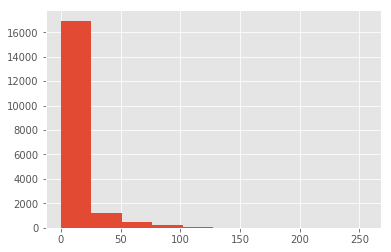

In [13]:
plt.hist(all_data.Age)

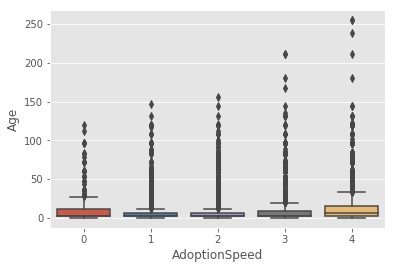

In [16]:
sns.boxplot('AdoptionSpeed', 'Age', data=train)

In [19]:
train[train.Age > 30]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
15,1,Max,78,218,205,1,1,7,0,2,...,1,0,41326,39112c637c80a6055e8ec544416abffe,0,We moved out of our apartment to a landed home...,1fd342e17,2.0,4,train
25,2,Garfield,36,285,251,1,3,0,0,3,...,1,0,41326,001e42763024f9d4abe31e79472b1827,0,Garfield is a very large cat. Needs daily groo...,cf7d3eec0,3.0,2,train
47,1,Lollipop,72,307,0,2,2,7,0,2,...,1,0,41326,c9a898071102b4fc7d485be4ff0e35d9,0,"She is a calm, gentle, good-mannered, friendly...",ea159d8da,3.0,4,train
49,2,Alang,60,264,0,1,1,2,7,3,...,1,0,41326,d835d7d98b94ec261d6d889a39eaed73,0,Hi... I have one long haired adult male cat fo...,0d25f084f,3.0,2,train
62,1,Milky,60,307,0,2,2,5,0,2,...,1,0,41326,167e96a28fab246120f636262f0308d4,0,Milky was dump ard our area for more than half...,3181e5424,2.0,4,train
65,1,Ding Ding,48,205,0,2,2,5,0,2,...,1,0,41326,3b4973ac9e6a430314f5cfd356fdb3e4,0,Ding Ding is adopted. Thanks.,e8d0907ae,5.0,1,train
69,1,Jasz,62,307,0,1,1,3,6,2,...,1,0,41401,de218e291145dbc92083d5bc292d10b8,0,Jasz is a very friendly and well-behaved Schna...,ef14861df,3.0,4,train
70,1,QiQi,36,307,0,2,1,2,0,2,...,5,0,41326,2147467fcd35e7a3bc23b9edcffc5702,0,I rescued QiQi with her sibling (Xiao Bai -) 3...,a9bc357f0,1.0,4,train
86,2,Lulu,47,250,285,2,1,2,0,2,...,1,0,41326,299e22e2f31f5a1be0fa923ca3cd90a3,0,I've had lulu since she was just a few weeks o...,e9df3ead7,2.0,4,train
102,1,Jasz Michael,60,195,0,1,6,0,0,2,...,1,0,41401,f6593a1c5d44e6b10048105280701642,0,Looking for a temporary foster home from Septe...,dae92dd61,3.0,4,train


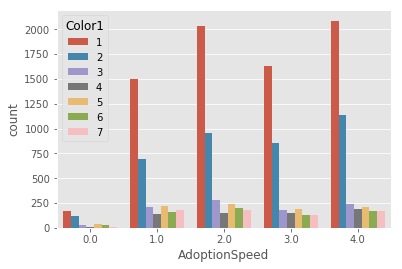

In [11]:
sns.countplot('AdoptionSpeed', hue='Color1', data=all_data)

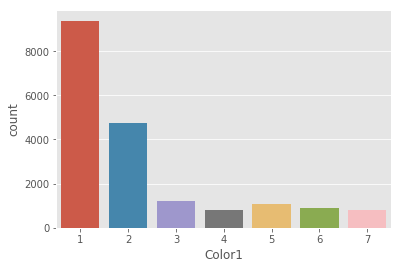

In [12]:
sns.countplot('Color1', data=all_data)

In [7]:
all_data.groupby('dataset_type')['AdoptionSpeed'].value_counts(normalize=True)

dataset_type  AdoptionSpeed
train         4.0              0.279931
              2.0              0.269259
              3.0              0.217368
              1.0              0.206096
              0.0              0.027346
Name: AdoptionSpeed, dtype: float64

In [8]:
all_data.dataset_type.value_counts()

train    14993
test      3948
Name: dataset_type, dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 24 columns):
Type            3948 non-null int64
Name            3645 non-null object
Age             3948 non-null int64
Breed1          3948 non-null int64
Breed2          3948 non-null int64
Gender          3948 non-null int64
Color1          3948 non-null int64
Color2          3948 non-null int64
Color3          3948 non-null int64
MaturitySize    3948 non-null int64
FurLength       3948 non-null int64
Vaccinated      3948 non-null int64
Dewormed        3948 non-null int64
Sterilized      3948 non-null int64
Health          3948 non-null int64
Quantity        3948 non-null int64
Fee             3948 non-null int64
State           3948 non-null int64
RescuerID       3948 non-null object
VideoAmt        3948 non-null int64
Description     3946 non-null object
PetID           3948 non-null object
PhotoAmt        3948 non-null float64
dataset_type    3948 non-null object
dtypes: float64(1), in